# Импортирование библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Загрузка датасета

In [2]:
clients = pd.read_csv('df_test_middle.csv')

In [3]:
clients.head(5)

,Unnamed: 0,id,birth_date,gender,kval_flag,premial_flag,account_sum,remains_instrument_cnt,remains_sec,remains_bonds,...,input_cnt,input_sum,yields_365,yields_90,deals_sum_month,trancnt_month,deals_sec,deals_bonds,deals_der,deals_curr
0,0,1,1978-08-29 00:00:00,male,0.0,0.0,525603.00,6.0,NaN,NaN,...,0.0,0.0,39.000000,48.000000,NaN,NaN,0,0,0,0
1,1,2,1977-10-25 00:00:00,female,1.0,1.0,6804816.15,60.0,48.0,4.0,...,0.0,0.0,20.809807,20.156107,1.493025e+07,407.0,1,1,1,1
2,2,3,1984-05-21 00:00:00,male,0.0,0.0,1292285.04,16.0,9.0,9.0,...,1.0,1003745.0,-34.074353,-16.948864,2.330273e+07,569.0,0,1,1,0
3,3,4,1980-01-21 00:00:00,male,0.0,0.0,0.00,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,0,0,0,0
4,4,5,1991-04-19 00:00:00,male,0.0,0.0,0.00,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,0,0,0,0


In [4]:
#Не все столбцы отображаются, применим следующий синтаксис, чтоб увидеть
pd.set_option('display.max_columns', None)

In [5]:
clients.head(5)

,Unnamed: 0,id,birth_date,gender,kval_flag,premial_flag,account_sum,remains_instrument_cnt,remains_sec,remains_bonds,remains_der,remains_curr,input_cnt,input_sum,yields_365,yields_90,deals_sum_month,trancnt_month,deals_sec,deals_bonds,deals_der,deals_curr
0,0,1,1978-08-29 00:00:00,male,0.0,0.0,525603.00,6.0,NaN,NaN,NaN,4.0,0.0,0.0,39.000000,48.000000,NaN,NaN,0,0,0,0
1,1,2,1977-10-25 00:00:00,female,1.0,1.0,6804816.15,60.0,48.0,4.0,NaN,5.0,0.0,0.0,20.809807,20.156107,1.493025e+07,407.0,1,1,1,1
2,2,3,1984-05-21 00:00:00,male,0.0,0.0,1292285.04,16.0,9.0,9.0,4.0,3.0,1.0,1003745.0,-34.074353,-16.948864,2.330273e+07,569.0,0,1,1,0
3,3,4,1980-01-21 00:00:00,male,0.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,0,0,0
4,4,5,1991-04-19 00:00:00,male,0.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,0,0,0


In [6]:
clients.shape

(300000, 22)

In [7]:
#Один столбец под названием "Unnamed: 0" лишний в датасете, поэтому сразу исключаем его
clients = clients.drop(['Unnamed: 0'], axis = 1)

# Исследовательский анализ данных (EDA):

* Рассмотреть основные статистики и распределения переменных.
* Проанализировать наличие пропущенных значений и выбросов.
* Визуализировать данные: распределения, матрица корреляций и парные графики.



In [8]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      300000 non-null  int64  
 1   birth_date              300000 non-null  object 
 2   gender                  300000 non-null  object 
 3   kval_flag               300000 non-null  float64
 4   premial_flag            300000 non-null  float64
 5   account_sum             300000 non-null  float64
 6   remains_instrument_cnt  115544 non-null  float64
 7   remains_sec             68498 non-null   float64
 8   remains_bonds           21684 non-null   float64
 9   remains_der             9936 non-null    float64
 10  remains_curr            110795 non-null  float64
 11  input_cnt               300000 non-null  float64
 12  input_sum               300000 non-null  float64
 13  yields_365              116803 non-null  float64
 14  yields_90           

In [9]:
#Переведем дату рождения в тип данных datatime
clients['birth_date'] = pd.to_datetime(clients['birth_date'], errors='coerce')

* ***К количественным признакам относятся следующие признаки:*** account_sum, remains_instrument_cnt, remains_sec, remains_bonds, remains_der, remains_curr, input_cnt, input_sum, yields_365, yields_90, deals_sum_month, trancnt_month
* ***К категориальным признакам относятся следующие признаки:*** gender, kval_flag, premial_flag, deals_sec, deals_bonds, deals_der, deals_curr

In [10]:
#Количественные признаки
quant_char = ['account_sum', 'remains_instrument_cnt', 'remains_sec', 'remains_bonds', 'remains_der', 
              'remains_curr', 'input_cnt', 'input_sum', 'yields_365', 'yields_90', 'deals_sum_month', 'trancnt_month']
#Категориальные признаки
cat_char = ['gender', 'kval_flag', 'premial_flag', 'deals_sec', 'deals_bonds', 'deals_der', 'deals_curr']

In [11]:
#Смотрим количество пропущенных данных в каждом столбце и отсортируем в порядке убывания
clients.isnull().sum().sort_values(ascending = False).loc[lambda x: x>0]

remains_der               290064
remains_bonds             278316
trancnt_month             242063
deals_sum_month           242063
remains_sec               231502
remains_curr              189205
remains_instrument_cnt    184456
yields_365                183197
yields_90                 183197
birth_date                109560
dtype: int64

In [12]:
# Cмотрим процентную долю пропущенных значений в датасете
missing_values = clients.isnull().mean()*100
missing_values = missing_values[missing_values > 0]
missing_values = missing_values.sort_values(ascending = False)
missing_values

remains_der               96.688000
remains_bonds             92.772000
deals_sum_month           80.687667
trancnt_month             80.687667
remains_sec               77.167333
remains_curr              63.068333
remains_instrument_cnt    61.485333
yields_365                61.065667
yields_90                 61.065667
birth_date                36.520000
dtype: float64

Итак, для начала проведем первичный осмотр данных количественных признаков

In [13]:
clients[quant_char].describe()

,account_sum,remains_instrument_cnt,remains_sec,remains_bonds,remains_der,remains_curr,input_cnt,input_sum,yields_365,yields_90,deals_sum_month,trancnt_month
count,3.000000e+05,115544.000000,68498.000000,21684.000000,9936.000000,110795.000000,300000.000000,3.000000e+05,1.168030e+05,116803.000000,5.793700e+04,5.793700e+04
mean,6.255022e+05,11.018374,10.546337,8.595278,4.961151,3.803141,0.084377,5.106638e+04,3.089997e+01,21.019908,3.294708e+07,1.801621e+02
std,7.299851e+06,14.417482,11.580931,11.806000,7.638940,1.593728,0.523620,3.959742e+05,3.027356e+03,24.292371,2.206264e+09,9.645199e+03
min,-9.744090e+03,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000e+00,-3.115333e+02,-332.533289,1.012580e+04,0.000000e+00
25%,0.000000e+00,4.000000,4.000000,4.000000,3.000000,3.000000,0.000000,0.000000e+00,8.894446e+00,11.000000,4.710389e+05,7.000000e+00
50%,0.000000e+00,6.000000,7.000000,6.000000,4.000000,4.000000,0.000000,0.000000e+00,2.384915e+01,22.537650,8.449051e+05,1.300000e+01
75%,5.138353e+05,12.000000,13.000000,9.000000,6.000000,5.000000,0.000000,0.000000e+00,3.800000e+01,34.326442,1.952169e+06,4.200000e+01
max,2.063913e+09,1013.000000,851.000000,421.000000,461.000000,11.000000,49.000000,1.005217e+08,1.026035e+06,2300.903050,3.889873e+11,1.398346e+06


**Краткий вывод по первичному осмотру данных с помощью describe() для количественных признаков**
* ***account_sum:*** среднее равно 625 000, а стандартное отклонение равно 7 299 851, соответственно, достаточно большой разброс данных. Минимальное значение равно -9 744. Необходимо понять, убыток это или ошибка. Насколько возможны отрицательные значения на счетах клиентов?!
* ***remains_instrument_cnt:*** как мы уже посмотрели ранее, пропущенных значений составляет 61,4%, а также количество оставшихся инструментов варьируется от 1 до 1013 со средним значением 11. Чуть ниже я посмотрю на количество данных в разных диапазонах процентилей, чтоб понимать, как много данных, которые ниже 0.25 или выше 0.75
* ***remains_sec, remains_bonds, remains_der:*** наблюдаем примерно такую же картину, как и в столбце remains_instrument_cnt
* ***remains_curr:*** разброс умеренный, максимальное значение равно 11, а, значит, малое кол-во клиентов с относительно высокими остатками валюты
* ***input_cnt, input_sum***: медиана равно 0, а значит, что в основном, по этим параметрам клиенты не активны. 
* ***yields_365, yields_90:*** здесь имеются отрицательные значения. Эти параметры скорее всего коррелируют(позже это можно увидеть в таблице корреляций или с помощью таблицы тепловых значений). Средняя и медиана достаточно низкие. Возможно наблюдается какая-то тенденция на бирже, либо клиенты не рискуют. 
* ***deals_sum_month:*** слишком много пропущенных значений, поэтому отсутствует большая часть информации о сумме сделок Огромный разброс данных. Среднее равно 32 947 080, то есть среднее достаточно большое, активные клиенты совершали крупные сделки за месяц.
* ***trancnt_month:*** аналогично мало информации. Среднее значение и квартильные значения показывают, что большинство  клиентов(из имеющихся данных, не считая пропусков) совершают от нескольких до нескольких десятков транзакций в месяц. Однако есть небольшая группа клиентов с чрезвычайно высокой активностью. Вероятно это может быть выбросом, либо особая группа клиентов. 

#### Начнем анализ пропущенных значений. Список признаков, в которых пропущены значения уже имеются выше

Лидер по пропущенным значениям у нас remains_der. Я вывела датасет, отфильтровав отсутствующие данные по этому признаку. Моя гипотеза заключалась в том, что деривативы могут находить только у квалифицированных инвесторов, либо только у премиальных клиентов, но это не так. Поэтому я смею полагать, что всюду, где пропущены значения, должно стоять 0, поскольку при первичном анализе минимальным значением было 1.

In [14]:
clients[clients['remains_der'].notna()].head(5)

,id,birth_date,gender,kval_flag,premial_flag,account_sum,remains_instrument_cnt,remains_sec,remains_bonds,remains_der,remains_curr,input_cnt,input_sum,yields_365,yields_90,deals_sum_month,trancnt_month,deals_sec,deals_bonds,deals_der,deals_curr
2,3,1984-05-21,male,0.0,0.0,1292285.04,16.0,9.0,9.0,4.0,3.0,1.0,1003745.0,-34.074353,-16.948864,2.330273e+07,569.0,0,1,1,0
47,48,1981-06-12,female,0.0,0.0,151264.19,6.0,NaN,NaN,1.0,6.0,0.0,0.0,47.395489,107.412639,1.950204e+06,36.0,0,0,1,0
62,63,1973-05-30,male,1.0,0.0,1000990.28,24.0,10.0,10.0,1.0,7.0,2.0,935174.0,-5.380326,19.972316,1.445301e+06,96.0,1,1,1,1
100,101,1975-12-16,na,0.0,0.0,8466644.58,2.0,NaN,NaN,3.0,1.0,0.0,0.0,42.363689,103.417680,1.219918e+09,973.0,0,0,1,0
124,125,1987-05-23,male,1.0,0.0,865102.96,15.0,7.0,5.0,4.0,3.0,0.0,978160.0,17.919788,11.256697,1.209240e+07,72.0,1,1,1,0


In [15]:
clients[(clients['remains_der'].notna()) & (clients['premial_flag'] == 1)].head(5)

,id,birth_date,gender,kval_flag,premial_flag,account_sum,remains_instrument_cnt,remains_sec,remains_bonds,remains_der,remains_curr,input_cnt,input_sum,yields_365,yields_90,deals_sum_month,trancnt_month,deals_sec,deals_bonds,deals_der,deals_curr
397,398,1991-04-17,male,0.0,1.0,3.382814e+06,20.0,3.0,NaN,8.0,3.0,1.0,681420.0,11.744795,-15.536049,2.324940e+07,127.0,1,0,1,0
760,761,1970-09-06,female,0.0,1.0,4.779135e+06,32.0,24.0,4.0,3.0,6.0,0.0,0.0,15.007121,-33.608294,3.668022e+06,65.0,1,1,1,0
1476,1477,1967-09-28,male,0.0,1.0,1.234973e+08,64.0,44.0,9.0,4.0,3.0,0.0,0.0,132.204955,68.194738,8.296263e+06,122.0,1,1,1,0
2108,2109,1983-10-12,male,0.0,1.0,8.791424e+06,23.0,9.0,4.0,7.0,6.0,1.0,312292.0,6.969280,19.723171,3.640470e+06,45.0,1,1,1,0
2118,2119,1973-02-14,male,1.0,1.0,7.465516e+06,9.0,5.0,NaN,5.0,6.0,1.0,972284.0,-40.313139,-0.941621,4.410438e+07,464.0,1,0,1,0


Аналогичная ситуация и с признаками remains_instrument_cnt, remains_bonds, remains_curr, remains_sec. Пропущенные значения означают 0

In [16]:
clients[clients['remains_bonds'].notna()].head(5)

,id,birth_date,gender,kval_flag,premial_flag,account_sum,remains_instrument_cnt,remains_sec,remains_bonds,remains_der,remains_curr,input_cnt,input_sum,yields_365,yields_90,deals_sum_month,trancnt_month,deals_sec,deals_bonds,deals_der,deals_curr
1,2,1977-10-25,female,1.0,1.0,6804816.15,60.0,48.0,4.0,NaN,5.0,0.0,0.0,20.809807,20.156107,1.493025e+07,407.0,1,1,1,1
2,3,1984-05-21,male,0.0,0.0,1292285.04,16.0,9.0,9.0,4.0,3.0,1.0,1003745.0,-34.074353,-16.948864,2.330273e+07,569.0,0,1,1,0
24,25,1978-05-16,male,1.0,0.0,751741.71,9.0,6.0,5.0,NaN,3.0,0.0,0.0,61.846910,44.384218,4.687907e+05,22.0,1,1,0,0
35,36,1969-11-28,female,0.0,0.0,439592.43,10.0,NaN,8.0,NaN,6.0,0.0,0.0,32.786905,27.893687,9.726267e+05,1.0,0,1,0,0
44,45,1988-04-13,female,1.0,0.0,565337.56,23.0,3.0,9.0,NaN,6.0,0.0,0.0,21.109524,31.597860,NaN,NaN,0,0,0,0


Теперь разберемся с признаками deals_sum_month и trancnt_month

In [17]:
clients[(clients['deals_sum_month'].notna()) & (clients['trancnt_month'].notna())].head(5)

,id,birth_date,gender,kval_flag,premial_flag,account_sum,remains_instrument_cnt,remains_sec,remains_bonds,remains_der,remains_curr,input_cnt,input_sum,yields_365,yields_90,deals_sum_month,trancnt_month,deals_sec,deals_bonds,deals_der,deals_curr
1,2,1977-10-25,female,1.0,1.0,6804816.15,60.0,48.0,4.0,NaN,5.0,0.0,0.0,20.809807,20.156107,1.493025e+07,407.0,1,1,1,1
2,3,1984-05-21,male,0.0,0.0,1292285.04,16.0,9.0,9.0,4.0,3.0,1.0,1003745.0,-34.074353,-16.948864,2.330273e+07,569.0,0,1,1,0
8,9,1981-12-28,male,1.0,0.0,1563266.88,26.0,12.0,NaN,NaN,3.0,6.0,315242.0,-64.570814,13.307065,7.742155e+05,26.0,1,0,0,1
12,13,1962-06-18,male,0.0,0.0,461023.80,7.0,5.0,NaN,NaN,2.0,1.0,979196.0,48.992903,-1.396123,2.191635e+05,5.0,1,0,0,0
14,15,1954-04-30,male,0.0,0.0,1064905.51,4.0,NaN,NaN,NaN,5.0,0.0,0.0,-20.084931,22.653527,3.593198e+06,18.0,0,0,1,0


In [18]:
clients[(clients['deals_sum_month'].isna()) & (clients['trancnt_month'].isna())].head(5)

,id,birth_date,gender,kval_flag,premial_flag,account_sum,remains_instrument_cnt,remains_sec,remains_bonds,remains_der,remains_curr,input_cnt,input_sum,yields_365,yields_90,deals_sum_month,trancnt_month,deals_sec,deals_bonds,deals_der,deals_curr
0,1,1978-08-29,male,0.0,0.0,525603.0,6.0,NaN,NaN,NaN,4.0,0.0,0.0,39.0,48.0,NaN,NaN,0,0,0,0
3,4,1980-01-21,male,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,0,0,0
4,5,1991-04-19,male,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,0,0,0
5,6,1991-01-16,male,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,0,0,0
6,7,1966-10-18,male,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,0,0,0


In [19]:
clients[(clients['deals_sum_month'].notna()) & (clients['trancnt_month'].isna())]

,id,birth_date,gender,kval_flag,premial_flag,account_sum,remains_instrument_cnt,remains_sec,remains_bonds,remains_der,remains_curr,input_cnt,input_sum,yields_365,yields_90,deals_sum_month,trancnt_month,deals_sec,deals_bonds,deals_der,deals_curr


In [20]:
clients[(clients['deals_sum_month'].isna()) & (clients['trancnt_month'].notna())]

,id,birth_date,gender,kval_flag,premial_flag,account_sum,remains_instrument_cnt,remains_sec,remains_bonds,remains_der,remains_curr,input_cnt,input_sum,yields_365,yields_90,deals_sum_month,trancnt_month,deals_sec,deals_bonds,deals_der,deals_curr


Наблюдаем следующую картину: если была сделка с облигацией, с деривативами, с валютой или с ценными бумагами(абсолютно не важно, с какой из них и в каком количестве), то, соответственно, данные о транзакциях и о сумме сделок имеются в датасете. Если сделок никаких не было, то стоят пропущенные значения, что тоже наводит на мысль, что это означает отсутствие получения денег, и можно ставить вместо NaN ноль.

Следующим этапом разберемся с yields_365 и yields_90, то есть с доходностью за год и за 90 дней.

In [21]:
#выводим датасет только с теми значениями, которые не пропущены в доходностях
clients[(clients['yields_90'].notna()) & (clients['yields_365'].notna())]

,id,birth_date,gender,kval_flag,premial_flag,account_sum,remains_instrument_cnt,remains_sec,remains_bonds,remains_der,remains_curr,input_cnt,input_sum,yields_365,yields_90,deals_sum_month,trancnt_month,deals_sec,deals_bonds,deals_der,deals_curr
0,1,1978-08-29,male,0.0,0.0,525603.00,6.0,NaN,NaN,NaN,4.0,0.0,0.0,39.000000,48.000000,NaN,NaN,0,0,0,0
1,2,1977-10-25,female,1.0,1.0,6804816.15,60.0,48.0,4.0,NaN,5.0,0.0,0.0,20.809807,20.156107,1.493025e+07,407.0,1,1,1,1
2,3,1984-05-21,male,0.0,0.0,1292285.04,16.0,9.0,9.0,4.0,3.0,1.0,1003745.0,-34.074353,-16.948864,2.330273e+07,569.0,0,1,1,0
8,9,1981-12-28,male,1.0,0.0,1563266.88,26.0,12.0,NaN,NaN,3.0,6.0,315242.0,-64.570814,13.307065,7.742155e+05,26.0,1,0,0,1
11,12,1981-06-14,female,1.0,0.0,481803.23,6.0,NaN,NaN,NaN,4.0,0.0,0.0,19.748464,28.822848,NaN,NaN,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299989,299990,NaT,male,0.0,0.0,835148.17,8.0,4.0,NaN,NaN,1.0,0.0,0.0,100.076959,20.066636,3.147085e+05,9.0,1,0,0,0
299991,299992,NaT,male,0.0,0.0,839278.25,2.0,2.0,NaN,NaN,4.0,0.0,505367.0,22.185929,-22.406325,1.001330e+06,4.0,1,0,0,0
299992,299993,NaT,female,0.0,0.0,104368.66,5.0,NaN,NaN,NaN,2.0,0.0,0.0,-3.652938,36.000000,NaN,NaN,0,0,0,0
299994,299995,NaT,male,0.0,0.0,381967.02,3.0,NaN,NaN,NaN,5.0,0.0,0.0,35.000000,40.000000,NaN,NaN,0,0,0,0


В данном случае всюду, где пропущены значения о доходности, в основном нет никаких сделок и на счету нет денег. (таблица ниже)

In [22]:
clients[(clients['yields_90'].isna()) & (clients['yields_365'].isna())]

,id,birth_date,gender,kval_flag,premial_flag,account_sum,remains_instrument_cnt,remains_sec,remains_bonds,remains_der,remains_curr,input_cnt,input_sum,yields_365,yields_90,deals_sum_month,trancnt_month,deals_sec,deals_bonds,deals_der,deals_curr
3,4,1980-01-21,male,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,0,0,0
4,5,1991-04-19,male,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,0,0,0
5,6,1991-01-16,male,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,0,0,0
6,7,1966-10-18,male,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,0,0,0
7,8,1988-03-28,male,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299993,299994,NaT,male,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,0,0,0
299996,299997,NaT,male,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,0,0,0
299997,299998,NaT,female,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,0,0,0
299998,299999,NaT,male,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,0,0,0


Попытавшись ввести запрос для этих признаков с отсутствующими значениями, при котором сумма на счету будет больше 0, не получаем никаких данных

In [23]:
clients[(clients['yields_90'].isna()) & (clients['yields_365'].isna()) & (clients['account_sum']>0)]

,id,birth_date,gender,kval_flag,premial_flag,account_sum,remains_instrument_cnt,remains_sec,remains_bonds,remains_der,remains_curr,input_cnt,input_sum,yields_365,yields_90,deals_sum_month,trancnt_month,deals_sec,deals_bonds,deals_der,deals_curr


На счету действительно может не быть денег у клиента, но по таблице можно наблюдать следующее: чаще всего обязательно есть какой-то остаток ценных бумаг, облигаций и тд, 

In [24]:
clients[(clients['yields_90'].notna()) & (clients['yields_365'].notna()) & (clients['account_sum']==0)]

,id,birth_date,gender,kval_flag,premial_flag,account_sum,remains_instrument_cnt,remains_sec,remains_bonds,remains_der,remains_curr,input_cnt,input_sum,yields_365,yields_90,deals_sum_month,trancnt_month,deals_sec,deals_bonds,deals_der,deals_curr
13,14,1973-08-22,male,0.0,0.0,0.0,5.0,3.0,NaN,NaN,NaN,0.0,0.0,37.000000,49.000000,NaN,NaN,0,0,0,0
143,144,1973-06-22,male,1.0,0.0,0.0,3.0,NaN,NaN,NaN,5.0,0.0,0.0,32.000000,15.000000,NaN,NaN,0,0,0,0
226,227,1961-01-20,male,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,26.000000,29.000000,NaN,NaN,0,0,0,0
228,229,1972-06-20,female,1.0,0.0,0.0,3.0,NaN,NaN,NaN,1.0,0.0,0.0,40.000000,40.000000,NaN,NaN,0,0,0,0
301,302,1985-01-07,female,0.0,0.0,0.0,3.0,2.0,NaN,NaN,6.0,0.0,0.0,26.000000,43.000000,NaN,NaN,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299547,299548,1986-03-17,male,0.0,0.0,0.0,4.0,NaN,NaN,NaN,2.0,0.0,0.0,46.000000,31.000000,NaN,NaN,0,0,0,0
299553,299554,1986-04-15,male,0.0,0.0,0.0,5.0,NaN,NaN,NaN,2.0,0.0,0.0,36.000000,22.000000,NaN,NaN,0,0,0,0
299698,299699,1980-08-13,female,1.0,0.0,0.0,2.0,3.0,NaN,NaN,NaN,0.0,0.0,43.000000,17.000000,NaN,NaN,0,0,0,0
299746,299747,1990-07-10,male,1.0,0.0,0.0,3.0,3.0,NaN,NaN,NaN,0.0,0.0,-20.808041,18.892394,355823.8125,8.0,1,0,0,0


Введем такое громоздкое условие, при котором посмотрим на датасет с имеющимися(не пропущеными значениями) по нашим признакам, но при этом все признаки на остатки должны быть пропущенными. В таких случаях доходность либо отрицательная, либо слишком маленькая.

In [25]:
clients[(clients['yields_90'].notna()) &
        (clients['yields_365'].notna()) & 
        (clients['account_sum']==0) & 
        (clients['remains_instrument_cnt'].isna()) & 
        (clients['remains_sec'].isna()) & 
        (clients['remains_bonds'].isna()) & 
        (clients['remains_der'].isna()) & 
        (clients['remains_curr'].isna())]

,id,birth_date,gender,kval_flag,premial_flag,account_sum,remains_instrument_cnt,remains_sec,remains_bonds,remains_der,remains_curr,input_cnt,input_sum,yields_365,yields_90,deals_sum_month,trancnt_month,deals_sec,deals_bonds,deals_der,deals_curr
226,227,1961-01-20,male,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,26.000000,29.000000,NaN,NaN,0,0,0,0
730,731,1989-04-28,male,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,830215.0,-76.912867,-59.692400,8.845533e+05,6.0,1,0,0,0
775,776,1985-11-04,male,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,4.0,968655.0,-87.322451,-39.139707,2.550327e+08,2750.0,1,0,0,0
3111,3112,1977-03-10,male,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.411629,37.554317,NaN,NaN,0,0,0,0
7204,7205,1965-11-25,male,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,42.000000,21.000000,NaN,NaN,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284862,284863,NaT,male,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,16.000000,20.000000,NaN,NaN,0,0,0,0
286260,286261,1966-12-27,male,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,26.634017,27.278344,4.028664e+05,5.0,1,1,0,0
288851,288852,1944-04-15,female,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,42.000000,26.000000,NaN,NaN,0,0,0,0
289305,289306,1999-12-07,male,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,36.000000,18.000000,NaN,NaN,0,0,0,0


Теперь посмотрим наоборот, наши необходимые признаки должны быть пропущенными, а остатки - нет.

In [26]:
clients[((clients['yields_90'].isna()) & 
         (clients['yields_365'].isna()) & 
         (clients['account_sum'] == 0)) & 
        ((clients['remains_instrument_cnt'].notna()) | 
         (clients['remains_sec'].notna()) | 
         (clients['remains_bonds'].notna()) | 
         (clients['remains_der'].notna()) | 
         (clients['remains_curr'].notna()))]


,id,birth_date,gender,kval_flag,premial_flag,account_sum,remains_instrument_cnt,remains_sec,remains_bonds,remains_der,remains_curr,input_cnt,input_sum,yields_365,yields_90,deals_sum_month,trancnt_month,deals_sec,deals_bonds,deals_der,deals_curr
7736,7737,1985-12-31,male,0.0,0.0,0.0,3.0,NaN,NaN,NaN,2.0,0.0,0.0,NaN,NaN,NaN,NaN,0,0,0,0
94694,94695,NaT,male,0.0,0.0,0.0,1.0,NaN,NaN,NaN,4.0,0.0,0.0,NaN,NaN,NaN,NaN,0,0,0,0
117677,117678,NaT,male,0.0,0.0,0.0,2.0,NaN,NaN,NaN,4.0,0.0,142076.0,NaN,NaN,414166.5025,22.0,1,1,0,0
122267,122268,1969-06-02,male,0.0,0.0,0.0,3.0,NaN,NaN,NaN,6.0,0.0,0.0,NaN,NaN,147971.0000,9.0,0,0,0,1
155676,155677,NaT,male,0.0,0.0,0.0,3.0,NaN,NaN,NaN,3.0,0.0,413306.0,NaN,NaN,685653.2150,8.0,1,1,0,0
177532,177533,NaT,male,1.0,1.0,0.0,3.0,NaN,NaN,NaN,4.0,1.0,1702402.0,NaN,NaN,NaN,NaN,0,0,0,0
182585,182586,NaT,male,0.0,0.0,0.0,5.0,NaN,NaN,NaN,5.0,0.0,709295.0,NaN,NaN,NaN,NaN,0,0,0,0
203068,203069,1957-01-07,female,0.0,0.0,0.0,6.0,NaN,NaN,NaN,4.0,0.0,0.0,NaN,NaN,NaN,NaN,0,0,0,0
235879,235880,1982-03-17,female,1.0,0.0,0.0,2.0,NaN,NaN,NaN,2.0,3.0,164968.0,NaN,NaN,997091.7725,14.0,1,0,0,1
275490,275491,NaT,male,0.0,0.0,0.0,1.0,NaN,NaN,NaN,2.0,0.0,0.0,NaN,NaN,NaN,NaN,0,0,0,0


In [27]:
clients[((clients['yields_90'].notna()) & 
         (clients['yields_365'].notna()) & 
         (clients['account_sum'] == 0)) & 
        ((clients['remains_instrument_cnt'].notna()) | 
         (clients['remains_sec'].notna()) | 
         (clients['remains_bonds'].notna()) | 
         (clients['remains_der'].notna()) | 
         (clients['remains_curr'].notna()))]

,id,birth_date,gender,kval_flag,premial_flag,account_sum,remains_instrument_cnt,remains_sec,remains_bonds,remains_der,remains_curr,input_cnt,input_sum,yields_365,yields_90,deals_sum_month,trancnt_month,deals_sec,deals_bonds,deals_der,deals_curr
13,14,1973-08-22,male,0.0,0.0,0.0,5.0,3.0,NaN,NaN,NaN,0.0,0.0,37.000000,49.000000,NaN,NaN,0,0,0,0
143,144,1973-06-22,male,1.0,0.0,0.0,3.0,NaN,NaN,NaN,5.0,0.0,0.0,32.000000,15.000000,NaN,NaN,0,0,0,0
228,229,1972-06-20,female,1.0,0.0,0.0,3.0,NaN,NaN,NaN,1.0,0.0,0.0,40.000000,40.000000,NaN,NaN,0,0,0,0
301,302,1985-01-07,female,0.0,0.0,0.0,3.0,2.0,NaN,NaN,6.0,0.0,0.0,26.000000,43.000000,NaN,NaN,0,0,0,0
362,363,1991-01-21,male,0.0,0.0,0.0,5.0,NaN,NaN,NaN,6.0,0.0,0.0,23.000000,23.000000,NaN,NaN,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299547,299548,1986-03-17,male,0.0,0.0,0.0,4.0,NaN,NaN,NaN,2.0,0.0,0.0,46.000000,31.000000,NaN,NaN,0,0,0,0
299553,299554,1986-04-15,male,0.0,0.0,0.0,5.0,NaN,NaN,NaN,2.0,0.0,0.0,36.000000,22.000000,NaN,NaN,0,0,0,0
299698,299699,1980-08-13,female,1.0,0.0,0.0,2.0,3.0,NaN,NaN,NaN,0.0,0.0,43.000000,17.000000,NaN,NaN,0,0,0,0
299746,299747,1990-07-10,male,1.0,0.0,0.0,3.0,3.0,NaN,NaN,NaN,0.0,0.0,-20.808041,18.892394,355823.8125,8.0,1,0,0,0


In [28]:
clients[(clients['yields_90'].notna()) & (clients['yields_365'].isna())].head(5)

,id,birth_date,gender,kval_flag,premial_flag,account_sum,remains_instrument_cnt,remains_sec,remains_bonds,remains_der,remains_curr,input_cnt,input_sum,yields_365,yields_90,deals_sum_month,trancnt_month,deals_sec,deals_bonds,deals_der,deals_curr


In [29]:
clients[(clients['yields_90']==0.0) & (clients['yields_365']==0.0)]

,id,birth_date,gender,kval_flag,premial_flag,account_sum,remains_instrument_cnt,remains_sec,remains_bonds,remains_der,remains_curr,input_cnt,input_sum,yields_365,yields_90,deals_sum_month,trancnt_month,deals_sec,deals_bonds,deals_der,deals_curr


In [30]:
clients[(clients['yields_90'].isna()) & (clients['yields_365'].notna())]

,id,birth_date,gender,kval_flag,premial_flag,account_sum,remains_instrument_cnt,remains_sec,remains_bonds,remains_der,remains_curr,input_cnt,input_sum,yields_365,yields_90,deals_sum_month,trancnt_month,deals_sec,deals_bonds,deals_der,deals_curr


Я прихожу к выводу, что там, где отсутствуют значения, должно стоять 0 и означать, что не было никакой доходности исходя из анализа. В датасета абсолютно отсутствуют значения, где yields_90 или yields_365 были бы равны 0, что наталкивает на мысль, что система выдает отсутствие значений вовсе. Также эти признаки я рассматривала попарно, так как пропущены и заполнены значения попарно. В конце, проведя проверку, я в этом убедилась.

Теперь необходимо разобраться с датами рождения клиентов.

In [31]:
clients['birth_date'].describe()

count                           190440
mean     1980-02-20 21:31:54.461247552
min                1917-07-07 00:00:00
25%                1972-04-25 00:00:00
50%                1981-08-31 12:00:00
75%                1989-02-14 00:00:00
max                2020-01-12 00:00:00
Name: birth_date, dtype: object

In [32]:
clients[clients['birth_date'].isna()]

,id,birth_date,gender,kval_flag,premial_flag,account_sum,remains_instrument_cnt,remains_sec,remains_bonds,remains_der,remains_curr,input_cnt,input_sum,yields_365,yields_90,deals_sum_month,trancnt_month,deals_sec,deals_bonds,deals_der,deals_curr
23805,23806,NaT,female,0.0,0.0,658475.27,12.0,10.0,NaN,NaN,2.0,0.0,0.0,22.723125,-2.043945,NaN,NaN,0,0,0,0
23806,23807,NaT,male,0.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,0,0,0
23807,23808,NaT,female,1.0,0.0,1438098.36,13.0,13.0,NaN,NaN,4.0,0.0,0.0,15.291086,97.247309,221806.415,8.0,1,0,0,0
23808,23809,NaT,male,0.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,0,0,0
23809,23810,NaT,male,0.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,299996,NaT,female,0.0,0.0,1686029.28,6.0,3.0,NaN,NaN,6.0,0.0,0.0,-20.345624,-3.943672,511567.575,12.0,1,0,0,0
299996,299997,NaT,male,0.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,0,0,0
299997,299998,NaT,female,0.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,0,0,0
299998,299999,NaT,male,0.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,0,0,0


In [33]:
clients[clients['birth_date'].notna()].sort_values(by = 'birth_date')

,id,birth_date,gender,kval_flag,premial_flag,account_sum,remains_instrument_cnt,remains_sec,remains_bonds,remains_der,remains_curr,input_cnt,input_sum,yields_365,yields_90,deals_sum_month,trancnt_month,deals_sec,deals_bonds,deals_der,deals_curr
267497,267498,1917-07-07,male,0.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,0,0,0
66153,66154,1922-10-02,male,0.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,0,0,0
267742,267743,1923-06-19,male,1.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,0,0,0
143104,143105,1923-07-25,male,1.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,0,0,0
83016,83017,1923-11-03,female,0.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69992,69993,2018-04-12,female,1.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,0,0,0
190575,190576,2018-09-04,male,0.0,0.0,549917.97,NaN,NaN,NaN,NaN,NaN,0.0,0.0,35.544295,29.769485,NaN,NaN,0,0,0,0
84666,84667,2018-11-11,male,0.0,0.0,506091.97,4.0,4.0,NaN,NaN,1.0,0.0,533902.0,14.884218,26.884218,NaN,NaN,0,0,0,0
233521,233522,2019-07-05,male,0.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,0,0,0


Даты рождения стоит заменить медианными значениями

#### Теперь приступим к анализу аномальных значений

Необходимо создать датафрейм с перцентилями для всех числовых признаков от 75 до 100, чтоб выявить выбросы 

In [34]:
percentiles = np.append(np.arange(75, 101, 5), 99)
percentile_df = pd.DataFrame()

# Для каждого признака рассчитываем перцентили и добавляем их в DataFrame
for column in quant_char:
    percentile_values = np.percentile(clients[column].dropna(), percentiles)
    percentile_df[column] = percentile_values

# Устанавливаем индексы (перцентили) в DataFrame
percentile_df.index = percentiles
percentile_df.sort_index()

,account_sum,remains_instrument_cnt,remains_sec,remains_bonds,remains_der,remains_curr,input_cnt,input_sum,yields_365,yields_90,deals_sum_month,trancnt_month
75,5.138353e+05,12.0,13.0,9.0,6.0,5.0,0.0,0.000000e+00,3.800000e+01,34.326442,1.952169e+06,42.00
80,6.900401e+05,15.0,15.0,10.0,6.0,5.0,0.0,0.000000e+00,4.138888e+01,37.000000,3.120436e+06,58.00
85,8.606567e+05,18.0,18.0,13.0,7.0,6.0,0.0,0.000000e+00,4.500000e+01,40.000000,5.629731e+06,85.00
90,1.042058e+06,24.0,22.0,17.0,7.0,6.0,0.0,0.000000e+00,4.900000e+01,43.000000,1.217587e+07,141.00
95,1.840235e+06,35.0,30.0,26.0,9.0,6.0,1.0,4.557290e+05,5.780763e+01,47.174933,3.879835e+07,298.20
99,7.616320e+06,68.0,54.0,54.0,16.0,7.0,2.0,9.522211e+05,9.932945e+01,62.316092,2.712257e+08,1255.64
100,2.063913e+09,1013.0,851.0,421.0,461.0,11.0,49.0,1.005217e+08,1.026035e+06,2300.903050,3.889873e+11,1398346.00


А теперь разберем аномальные даты

In [35]:
clients[(clients['birth_date'] < (clients['birth_date'].quantile(0.20)))].sort_values(by = 'birth_date')

,id,birth_date,gender,kval_flag,premial_flag,account_sum,remains_instrument_cnt,remains_sec,remains_bonds,remains_der,remains_curr,input_cnt,input_sum,yields_365,yields_90,deals_sum_month,trancnt_month,deals_sec,deals_bonds,deals_der,deals_curr
267497,267498,1917-07-07,male,0.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,0,0,0
66153,66154,1922-10-02,male,0.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,0,0,0
267742,267743,1923-06-19,male,1.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,0,0,0
143104,143105,1923-07-25,male,1.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,0,0,0
83016,83017,1923-11-03,female,0.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288806,288807,1969-07-30,male,0.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,0,0,0
240558,240559,1969-07-30,male,0.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,0,0,0
22205,22206,1969-07-30,female,0.0,0.0,278421.56,3.0,NaN,NaN,NaN,1.0,0.0,0.0,47.000000,18.000000,NaN,NaN,0,0,0,0
84880,84881,1969-07-30,male,1.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,0,0,0


In [36]:
print('25-ый перцентиль:',clients['birth_date'].quantile(0.25))
print('20-ый перцентиль:',clients['birth_date'].quantile(0.20))
print('15-ый перцентиль:',clients['birth_date'].quantile(0.15))
print('10-ый перцентиль:',clients['birth_date'].quantile(0.10))
print('5-ый перцентиль:',clients['birth_date'].quantile(0.05))
print('1-ый перцентиль:',clients['birth_date'].quantile(0.01))

25-ый перцентиль: 1972-04-25 00:00:00
20-ый перцентиль: 1969-07-30 19:12:00.000000252
15-ый перцентиль: 1966-02-01 00:00:00
10-ый перцентиль: 1961-07-09 00:00:00
5-ый перцентиль: 1955-04-10 00:00:00
1-ый перцентиль: 1944-09-12 09:21:36


Предполагаю, что вряд ли люди, которые старше 70-80 активно занимаются биржей. Все, что ниже 5-го перцентиля-можно удалить

**Краткий вывод по анализу пропущенных значений и выбросов:**
* Заполняем нулями пропущенные значение. Я предполагаю, что система выдает отстутсвие значений там, где не совершалось сделок, нет остатков ценных бумаг и т.д.
* Все, что выше 99-го перцентиля-удаляем, так как во всех признаках наблюдаются экстремальные значения в этом пороге.

#### Визуализация данных

In [37]:
sns.color_palette("dark:salmon_r")

[(0.9803921568627451, 0.5019607843137255, 0.4470588235294118),
 (0.8206223693544625, 0.42905134566038194, 0.3844558865578708),
 (0.6608525818461801, 0.35614190700703835, 0.3218529495863298),
 (0.5010827943378977, 0.2832324683536948, 0.25925001261478886),
 (0.3413130068296151, 0.21032302970035122, 0.19664707564324785),
 (0.18154321932133266, 0.1374135910470077, 0.13404413867170692)]

In [38]:
sns.set_palette(sns.color_palette("dark:salmon_r"))

In [39]:
dark_salmon = sns.dark_palette("salmon", reverse=True)

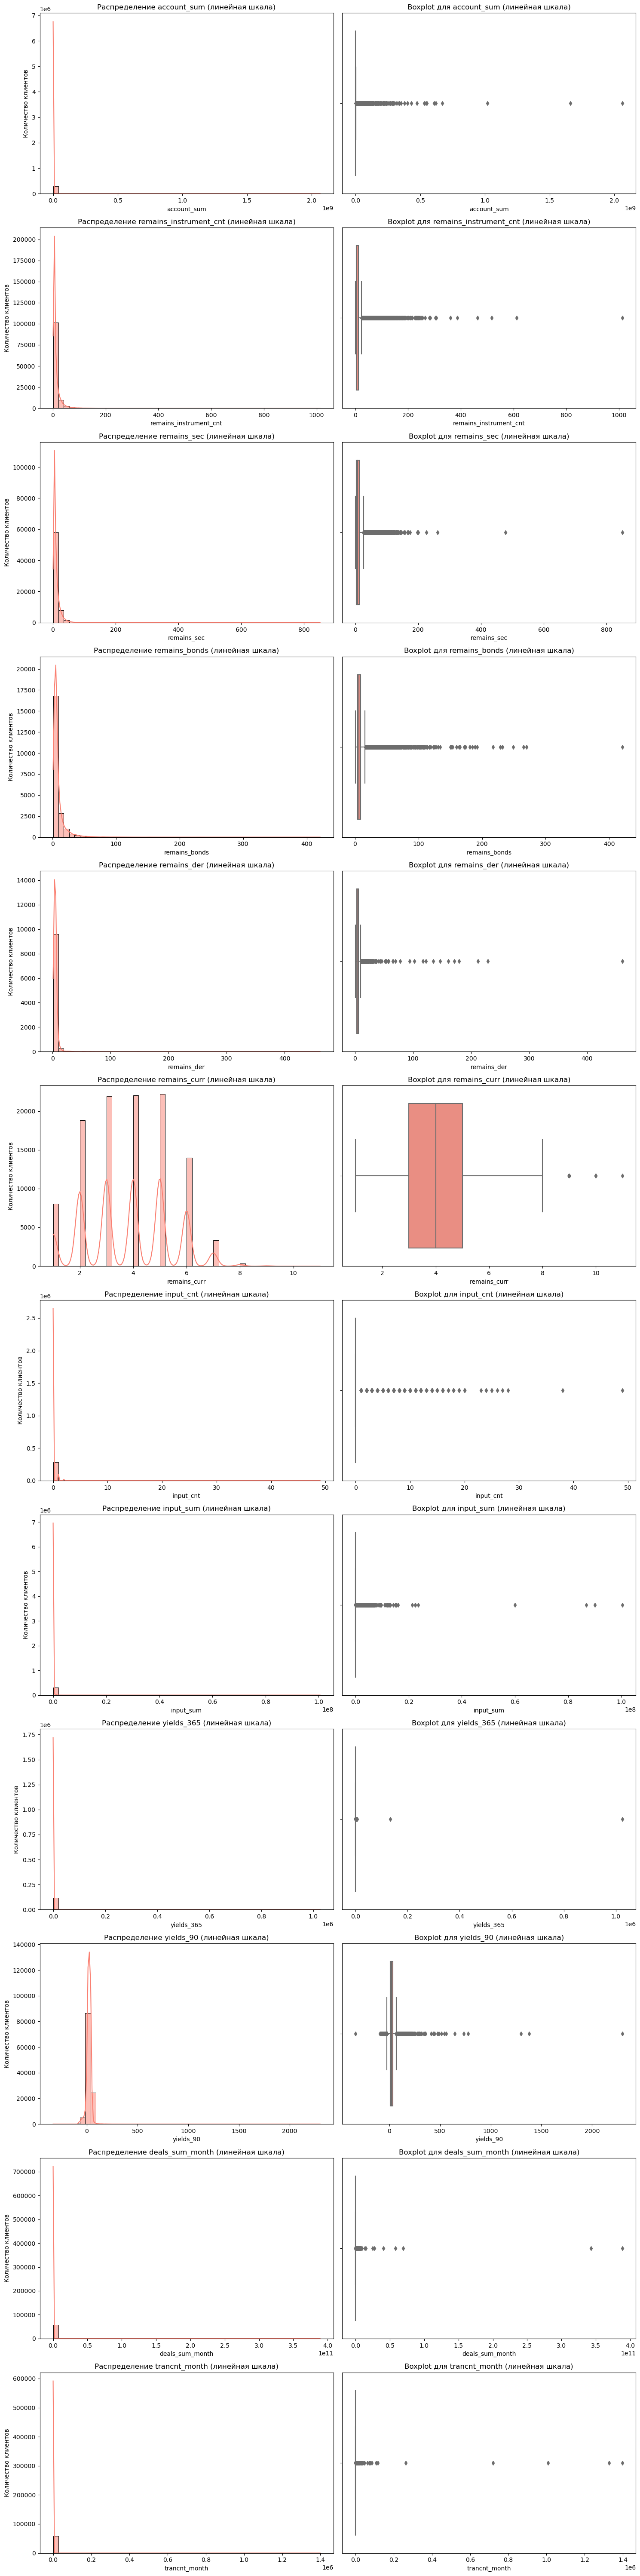

In [40]:
fig, axes = plt.subplots(len(quant_char), 2, figsize=(15, len(quant_char) * 5))

for i, col in enumerate(quant_char):
    sns.histplot(clients[col].dropna(), bins=50, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Распределение {col} (линейная шкала)')
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel('Количество клиентов')
    axes[i, 0].grid(False)

    sns.boxplot(x=clients[col].dropna(), ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot для {col} (линейная шкала)')
    axes[i, 1].set_xlabel(col)
    axes[i, 1].grid(False)

plt.tight_layout()
plt.show()

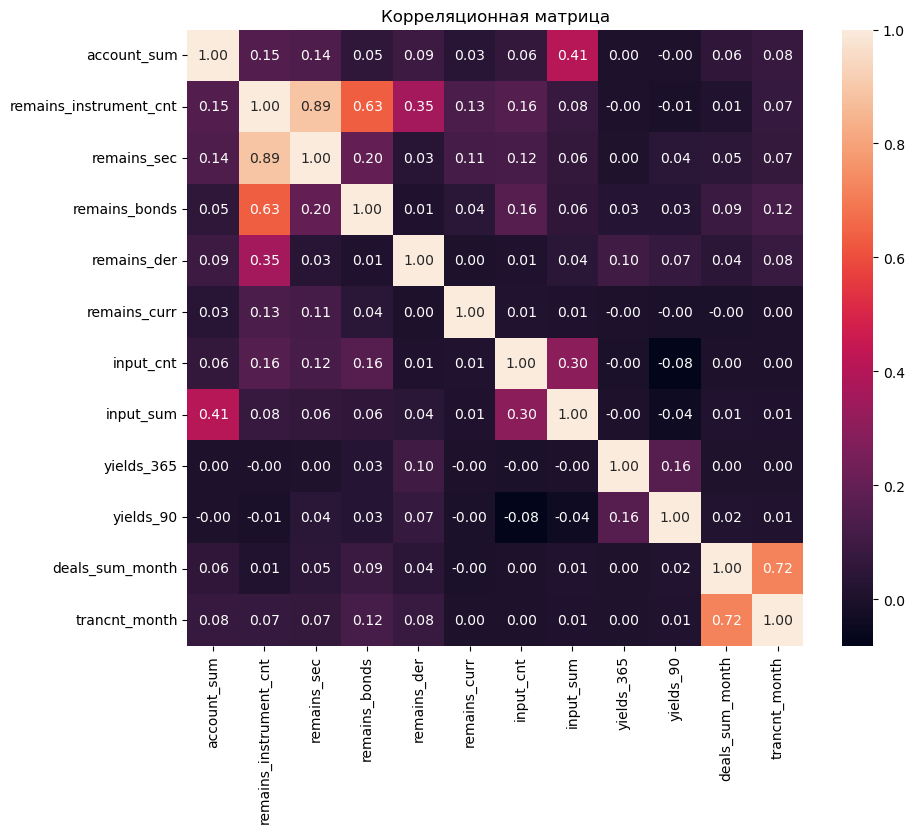

In [41]:
# Построение тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(clients[quant_char].corr(), annot=True, fmt=".2f", cbar=True, square=True)
plt.title('Корреляционная матрица')
plt.show()

#### Сильные положительные корреляции:
* ***remains_sec и remains_instrument_cnt - 0.89.*** 
     + Количество оставшихся инструментов тесно связано с остатком ценных бумаг. Чем больше инструментов, тем меньше ценных бумаг
* ***deals_sum_month и trancnt_month - 0.72.***
     + Количество транзакций за месяц положительно коррелирует с суммой сделок за месяц. Это логично, так как большее количество транзакций обычно связано с более высокой суммой сделок
* ***remains_bonds и remains_instrument_cnt - 0.63.***
     + Количество оставшихся инструментов также связано с остатком облигаций, хотя эта связь менее сильная, чем с ценными бумагами

**Умеренная корреляция между input_sum и account_sum, которая равна 0.41**

Рассмотрим гистограммы для возрастов и категориальных признаков

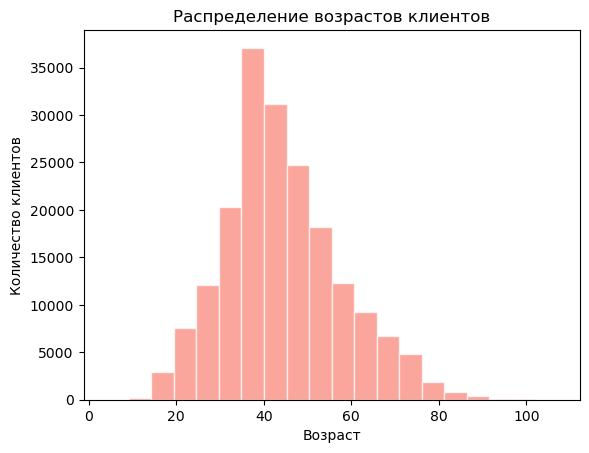

In [42]:
current_year = pd.Timestamp.now().year

plt.hist(current_year - clients['birth_date'].dt.year, bins=20,  alpha=0.7, edgecolor = 'white')
plt.title('Распределение возрастов клиентов')
plt.xlabel('Возраст')
plt.ylabel('Количество клиентов')
plt.grid(False)
plt.show()

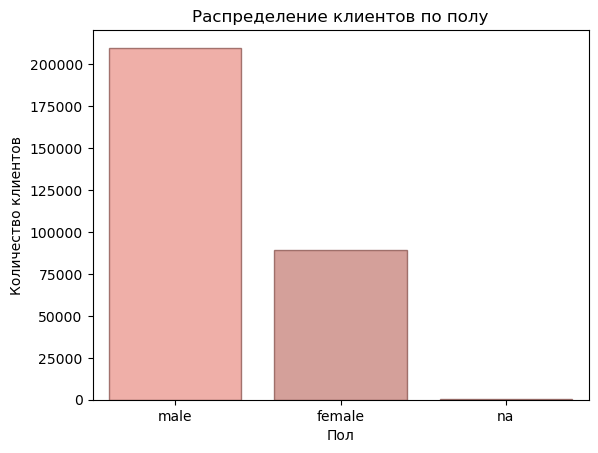

In [43]:

sns.countplot(x='gender', data=clients, alpha = 0.7, edgecolor = dark_salmon[3])
plt.title('Распределение клиентов по полу')
plt.xlabel('Пол')
plt.ylabel('Количество клиентов')
plt.grid(False)
plt.show()

In [44]:
clients['gender'].value_counts()

gender
male      209985
female     89441
na           574
Name: count, dtype: int64

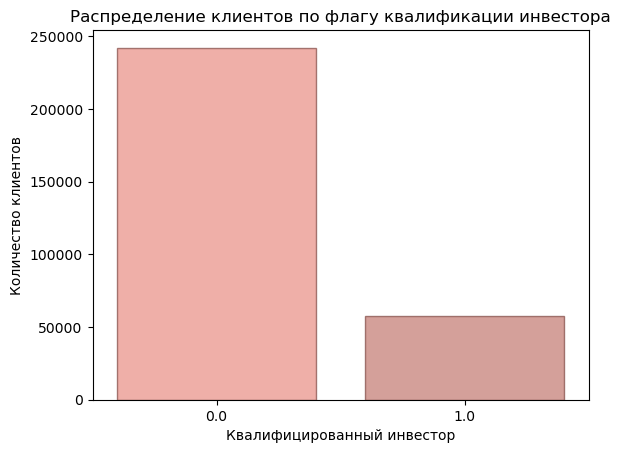

In [45]:
sns.countplot(x='kval_flag', data=clients, alpha = 0.7, edgecolor = dark_salmon[3])
plt.title('Распределение клиентов по флагу квалификации инвестора')
plt.xlabel('Квалифицированный инвестор')
plt.ylabel('Количество клиентов')
plt.grid(False)
plt.show()

In [46]:
clients['kval_flag'].value_counts()

kval_flag
0.0    242241
1.0     57759
Name: count, dtype: int64

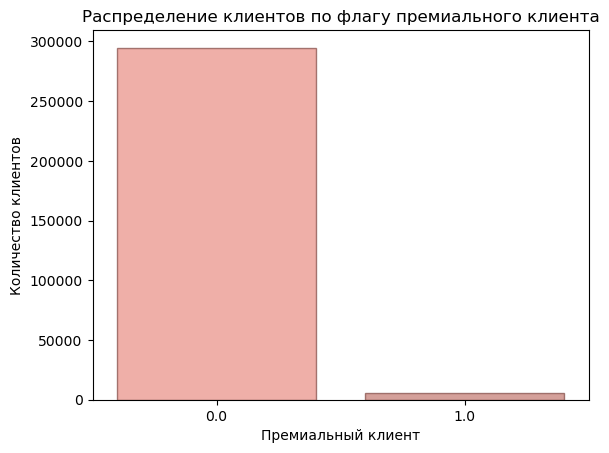

In [47]:
sns.countplot(x='premial_flag', data=clients, alpha = 0.7, edgecolor = dark_salmon[3])
plt.title('Распределение клиентов по флагу премиального клиента')
plt.xlabel('Премиальный клиент')
plt.ylabel('Количество клиентов')
plt.grid(False)
plt.show()

In [48]:
clients['premial_flag'].value_counts()

premial_flag
0.0    294666
1.0      5334
Name: count, dtype: int64

In [49]:
clients.columns

Index(['id', 'birth_date', 'gender', 'kval_flag', 'premial_flag',
       'account_sum', 'remains_instrument_cnt', 'remains_sec', 'remains_bonds',
       'remains_der', 'remains_curr', 'input_cnt', 'input_sum', 'yields_365',
       'yields_90', 'deals_sum_month', 'trancnt_month', 'deals_sec',
       'deals_bonds', 'deals_der', 'deals_curr'],
      dtype='object')

In [50]:
quant_char

['account_sum',
 'remains_instrument_cnt',
 'remains_sec',
 'remains_bonds',
 'remains_der',
 'remains_curr',
 'input_cnt',
 'input_sum',
 'yields_365',
 'yields_90',
 'deals_sum_month',
 'trancnt_month']

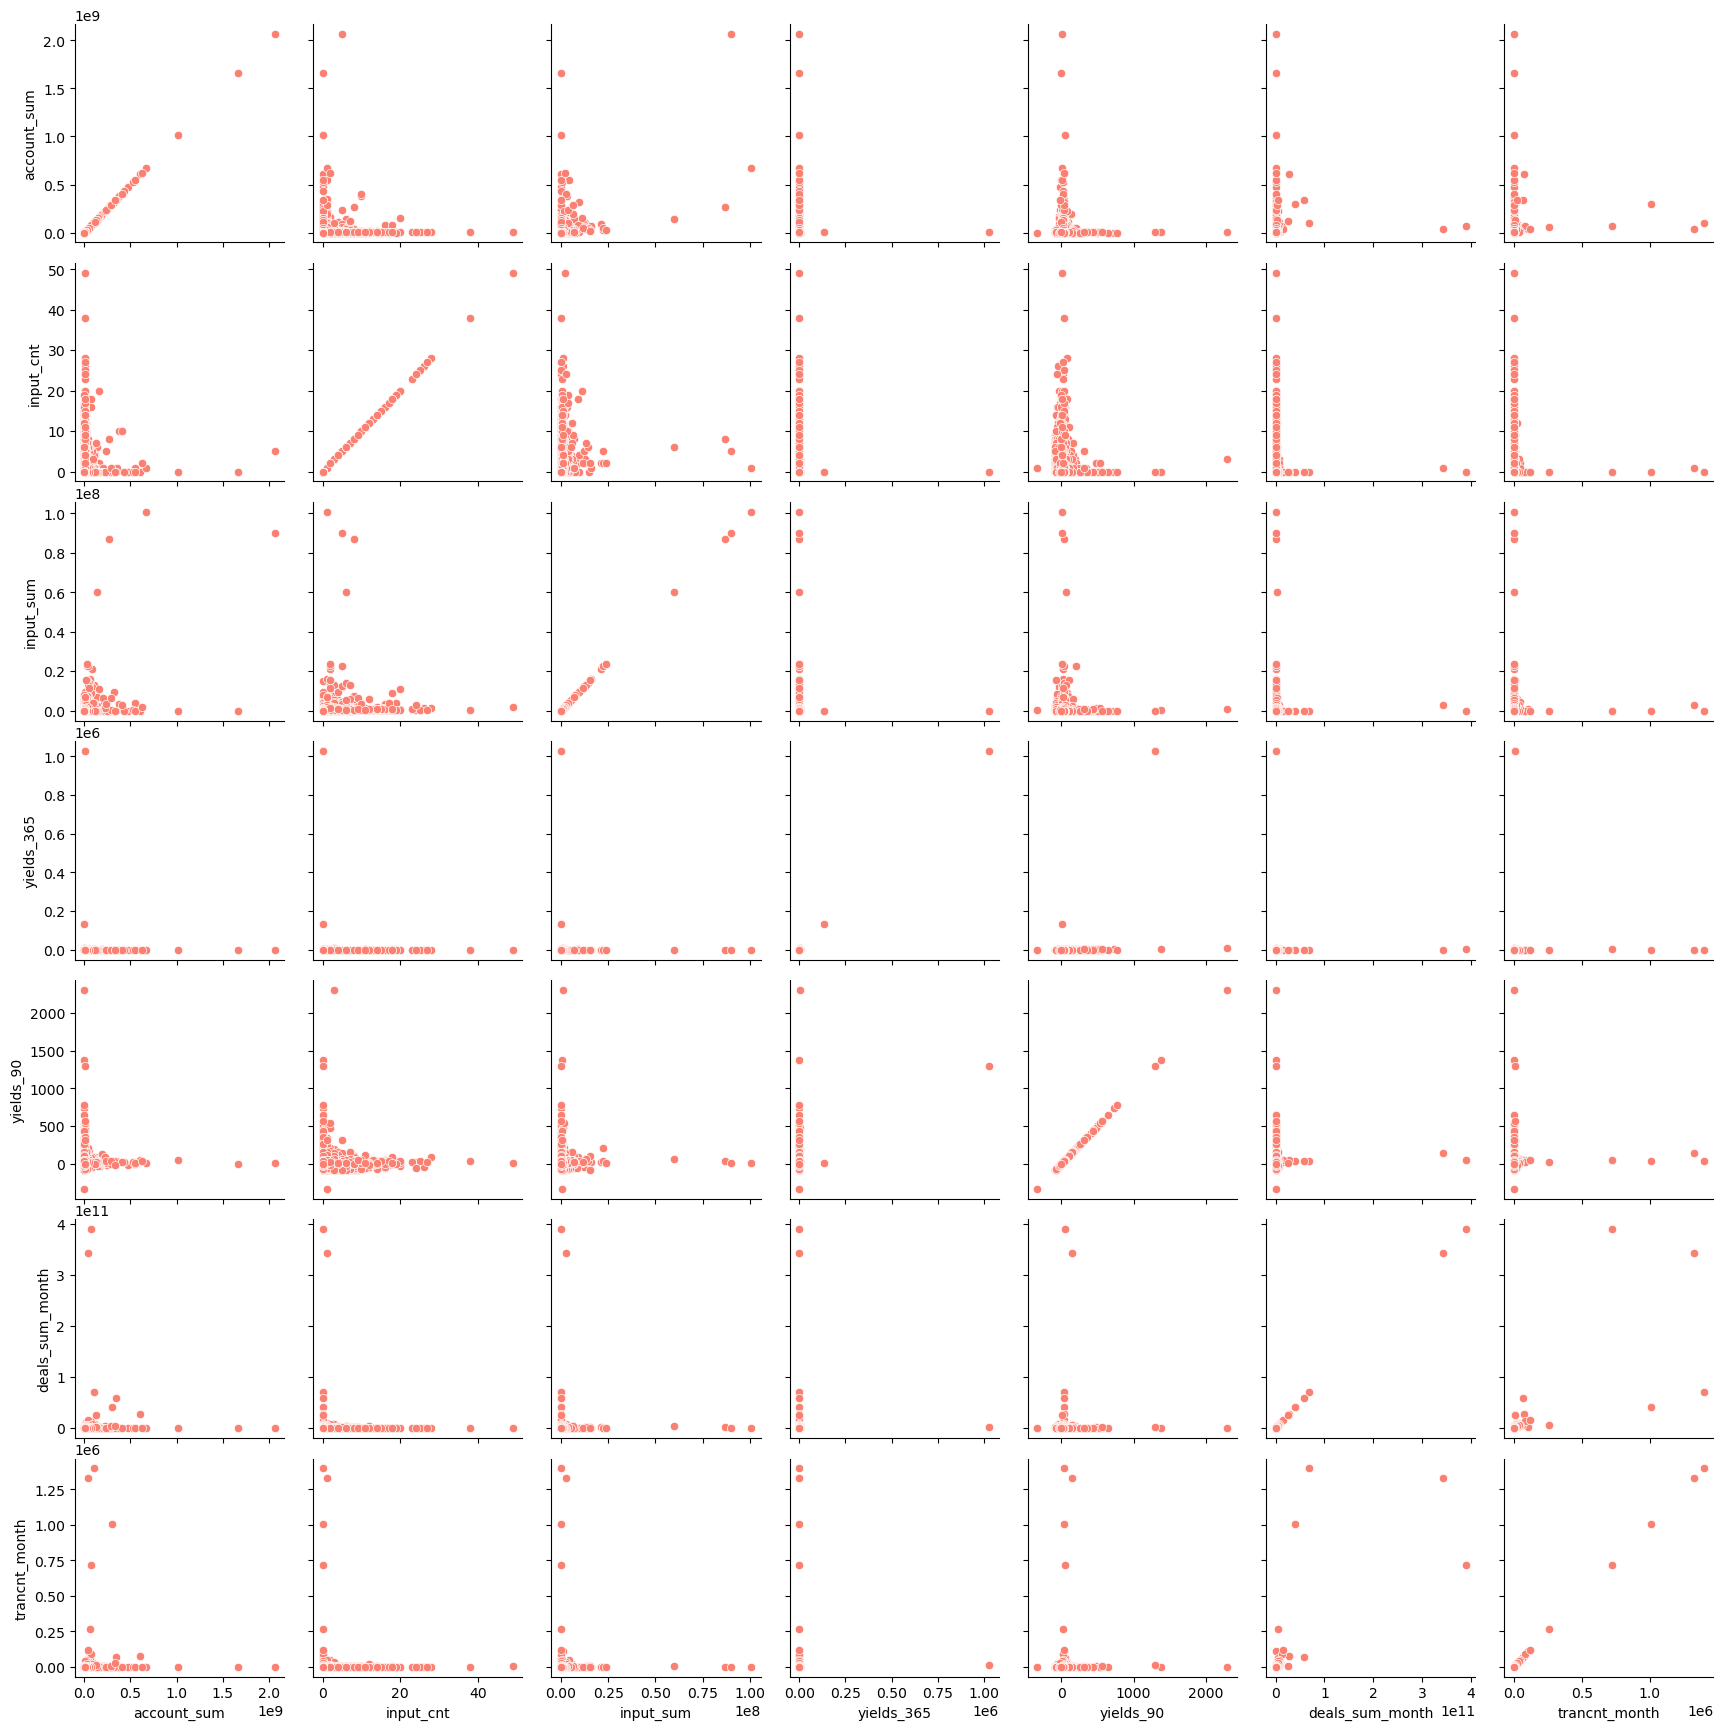

In [51]:
pair_vizul = sns.PairGrid(clients[['account_sum',
 'input_cnt',
 'input_sum',
 'yields_365',
 'yields_90',
 'deals_sum_month',
 'trancnt_month']])
pair_vizul.map(sns.scatterplot)

# Очистка и предобработка данных

* Обработать пропущенные значения и выбросы.
* Преобразовать категориальные переменные (например, пол клиента) в числовые.
* Нормализовать или стандартизировать числовые переменные, если это необходимо.


Приступаем к заполнению пропущенных данных, по итогам анализа, необходимо заполнить нулями все признаки кроме даты рождения. Даты рождения заполним медианой

In [52]:
clients_copy = clients.copy()
columns_to_fill = clients_copy.columns.difference(['birth_date'])
clients_copy[columns_to_fill] = clients_copy[columns_to_fill].fillna(0)
print(clients_copy.isna().sum())

id                             0
birth_date                109560
gender                         0
kval_flag                      0
premial_flag                   0
account_sum                    0
remains_instrument_cnt         0
remains_sec                    0
remains_bonds                  0
remains_der                    0
remains_curr                   0
input_cnt                      0
input_sum                      0
yields_365                     0
yields_90                      0
deals_sum_month                0
trancnt_month                  0
deals_sec                      0
deals_bonds                    0
deals_der                      0
deals_curr                     0
dtype: int64


In [53]:
median_birth_date = clients_copy['birth_date'].median()
clients_copy['birth_date'] = clients_copy['birth_date'].fillna(median_birth_date)
print(clients_copy['birth_date'].isna().sum())


0


Устраняем аномалии, установив квантиль равный 99.

In [54]:
for col in quant_char:
    upper_limit = clients_copy[col].quantile(0.99)
    clients_copy= clients_copy[clients_copy[col] < upper_limit]

Также избавляемся от аномалий в дате рождения. Все, что ниже 5 перцентиля-удаляем

In [55]:
birth_date_lower_limit = clients_copy['birth_date'].quantile(0.05)
clients_copy = clients_copy[clients_copy['birth_date'] > birth_date_lower_limit]

print(clients_copy['birth_date'].describe())

count                           235027
mean     1982-05-14 16:29:49.913499328
min                1958-11-09 00:00:00
25%                1980-07-06 00:00:00
50%                1981-08-31 12:00:00
75%                1985-08-07 00:00:00
max                2020-01-12 00:00:00
Name: birth_date, dtype: object


Ранее я заметила такую проблему, что в столбце gender имеются 430 значений под названием na. Поэтому половину я определю как мужчин, другую половину как женщин. Сразу же необходимо преобразовать в числовые значения:
* 0 - female
* 1 - male

In [56]:
clients_copy[(clients_copy['gender']=='na')]

,id,birth_date,gender,kval_flag,premial_flag,account_sum,remains_instrument_cnt,remains_sec,remains_bonds,remains_der,remains_curr,input_cnt,input_sum,yields_365,yields_90,deals_sum_month,trancnt_month,deals_sec,deals_bonds,deals_der,deals_curr
236,237,1982-07-02,na,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,0.0,0,0,0,0
2354,2355,1982-10-22,na,0.0,0.0,1146723.44,6.0,0.0,0.0,0.0,5.0,0.0,0.0,43.349411,40.400212,1.469721e+06,8.0,0,0,0,1
2532,2533,1997-11-01,na,1.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,0.0,0,0,0,0
3905,3906,1958-12-08,na,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,0.0,0,0,0,0
3927,3928,1997-04-27,na,1.0,0.0,866889.05,6.0,4.0,0.0,0.0,4.0,0.0,0.0,1.401406,-5.717486,0.000000e+00,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297499,297500,2000-07-09,na,0.0,0.0,850187.88,1.0,0.0,0.0,0.0,5.0,0.0,0.0,5.096461,44.395842,0.000000e+00,0.0,0,0,0,0
297834,297835,2000-12-19,na,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,0.0,0,0,0,0
298695,298696,1974-07-13,na,1.0,0.0,428931.55,14.0,11.0,0.0,0.0,3.0,0.0,0.0,4.760788,19.985694,0.000000e+00,0.0,0,0,0,0
299278,299279,2002-04-28,na,0.0,0.0,935753.16,7.0,2.0,0.0,0.0,4.0,0.0,0.0,16.171041,21.902845,0.000000e+00,0.0,0,0,0,0


In [57]:
# Определяем индексы всех значений 'na' в столбце 'gender'
na_indices = clients_copy[clients_copy['gender'] == 'na'].index

# Делим эти индексы пополам
half = len(na_indices) // 2

# Первую половину заменяем на 'female', вторую на 'male'
clients_copy.loc[na_indices[:half], 'gender'] = 'female'
clients_copy.loc[na_indices[half:], 'gender'] = 'male'

# Преобразование значений 'male' и 'female' в числовые значения
clients_copy['gender'] = clients_copy['gender'].map({'male': 1, 'female': 0})

# Проверим результат
clients_copy['gender'].value_counts()

gender
1    167430
0     67597
Name: count, dtype: int64

Некоторые категориальные переменные имеют тип данных float64, необходимо преобразовать в int

In [58]:
clients_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 235027 entries, 0 to 299999
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      235027 non-null  int64         
 1   birth_date              235027 non-null  datetime64[ns]
 2   gender                  235027 non-null  int64         
 3   kval_flag               235027 non-null  float64       
 4   premial_flag            235027 non-null  float64       
 5   account_sum             235027 non-null  float64       
 6   remains_instrument_cnt  235027 non-null  float64       
 7   remains_sec             235027 non-null  float64       
 8   remains_bonds           235027 non-null  float64       
 9   remains_der             235027 non-null  float64       
 10  remains_curr            235027 non-null  float64       
 11  input_cnt               235027 non-null  float64       
 12  input_sum               235027 non-

In [59]:
clients_copy['kval_flag'] = clients_copy['kval_flag'].astype(int)
clients_copy['premial_flag'] = clients_copy['premial_flag'].astype(int)
clients_copy['remains_instrument_cnt'] = clients_copy['remains_instrument_cnt'].astype(int)
clients_copy['remains_sec'] = clients_copy['remains_sec'].astype(int)
clients_copy['remains_bonds'] = clients_copy['remains_bonds'].astype(int)
clients_copy['remains_der'] = clients_copy['remains_der'].astype(int)
clients_copy['remains_curr'] = clients_copy['remains_curr'].astype(int)
clients_copy['input_cnt'] = clients_copy['input_cnt'].astype(int)
clients_copy['trancnt_month'] = clients_copy['trancnt_month'].astype(int)

In [60]:
clients_copy.describe()

,id,birth_date,gender,kval_flag,premial_flag,account_sum,remains_instrument_cnt,remains_sec,remains_bonds,remains_der,remains_curr,input_cnt,input_sum,yields_365,yields_90,deals_sum_month,trancnt_month,deals_sec,deals_bonds,deals_der,deals_curr
count,235027.000000,235027,235027.000000,235027.000000,235027.000000,2.350270e+05,235027.000000,235027.000000,235027.000000,235027.000000,235027.000000,235027.0,235027.000000,235027.000000,235027.000000,2.350270e+05,235027.000000,235027.000000,235027.000000,235027.000000,235027.000000
mean,150097.465138,1982-05-14 16:29:49.913499328,0.712386,0.164385,0.012360,1.843769e+05,1.838533,0.976539,0.121475,0.010348,0.810877,0.0,3535.864284,5.328466,5.692760,5.601528e+04,0.797930,0.064218,0.011790,0.013713,0.003727
min,1.000000,1958-11-09 00:00:00,0.000000,0.000000,0.000000,-9.744090e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,-114.586439,-89.655009,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,76137.500000,1980-07-06 00:00:00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,150168.000000,1981-08-31 12:00:00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
75%,224811.500000,1985-08-07 00:00:00,1.000000,0.000000,0.000000,0.000000e+00,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
max,300000.000000,2020-01-12 00:00:00,1.000000,1.000000,1.000000,7.596953e+06,43.000000,22.000000,8.000000,4.000000,5.000000,0.0,606418.000000,63.469724,48.383892,4.639319e+06,34.000000,1.000000,1.000000,1.000000,1.000000
std,86264.753348,NaN,0.452651,0.370626,0.110488,4.954245e+05,4.178741,2.981229,0.787784,0.179763,1.559563,0.0,37823.915032,15.534003,13.159104,2.454976e+05,3.413492,0.245142,0.107941,0.116298,0.060937


Между нормализацией и стандартизацией я выбираю нормализацию по следующим причинам:

* Разные масштабы данных: В этом датасете присутствуют числовые признаки с сильно различающимися диапазонами значений, например, суммы на счетах и количество транзакций. Нормализация приводит все признаки в единый масштаб (от 0 до 1), что предотвращает доминирование признаков с большими значениями.

* Алгоритмы сегментации: Основная задача-это сегментация, а значит, что признаки чувствительные к расстоянию (например, K-means), нормализация помогает уравнять вклад всех признаков в расчет расстояний между точками, что улучшает результаты кластеризации.

* Сравнимость признаков: Нормализация делает признаки с разными диапазонами и единицами измерения сравнимыми, что особенно важно в задачах сегментации, где все признаки должны быть равноправны при определении групп клиентов.

Таким образом, нормализация была выбрана, чтобы обеспечить сбалансированный вклад всех числовых признаков в процесс сегментации и избежать перекосов, вызванных различиями в масштабе данных.

Все отлично, но необходимо преобразовать даты рождения в возраст клиентов на сегодняшний день, чтоб они тоже были числовыми признаками

In [61]:
clients_copy['age'] = clients_copy['birth_date'].apply(lambda x: datetime.now().year - pd.to_datetime(x).year)

In [62]:
clients_copy = clients_copy.drop(columns=['birth_date'])

In [63]:
quant_char.append('age')

In [64]:
clients_cluster = clients_copy.copy()

In [65]:
id_client = clients_copy['id']
clients_copy = clients_copy.drop(columns=['id'])

In [66]:
scaler = StandardScaler()
clients_copy[quant_char] = scaler.fit_transform(clients_copy[quant_char])

In [67]:
feature = clients_copy.to_numpy()

In [68]:
pd.DataFrame(feature, columns=clients_copy.columns)

,gender,kval_flag,premial_flag,account_sum,remains_instrument_cnt,remains_sec,remains_bonds,remains_der,remains_curr,input_cnt,input_sum,yields_365,yields_90,deals_sum_month,trancnt_month,deals_sec,deals_bonds,deals_der,deals_curr,age
0,1.0,0.0,0.0,0.688756,0.995868,-0.327563,-0.154199,-0.057563,2.044887,0.0,-0.093482,2.167606,3.215062,-0.228171,-0.233758,0.0,0.0,0.0,0.0,0.442638
1,1.0,0.0,0.0,-0.372160,-0.439974,-0.327563,-0.154199,-0.057563,-0.519940,0.0,-0.093482,-0.343020,-0.432611,-0.228171,-0.233758,0.0,0.0,0.0,0.0,0.209915
2,1.0,0.0,0.0,-0.372160,-0.439974,-0.327563,-0.154199,-0.057563,-0.519940,0.0,-0.093482,-0.343020,-0.432611,-0.228171,-0.233758,0.0,0.0,0.0,0.0,-1.070062
3,1.0,0.0,0.0,-0.372160,-0.439974,-0.327563,-0.154199,-0.057563,-0.519940,0.0,-0.093482,-0.343020,-0.432611,-0.228171,-0.233758,0.0,0.0,0.0,0.0,-1.070062
4,1.0,0.0,0.0,-0.372160,-0.439974,-0.327563,-0.154199,-0.057563,-0.519940,0.0,-0.093482,-0.343020,-0.432611,-0.228171,-0.233758,0.0,0.0,0.0,0.0,1.838976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235022,1.0,0.0,0.0,0.398831,0.277947,-0.327563,-0.154199,-0.057563,2.686094,0.0,-0.093482,1.910106,2.607116,-0.228171,-0.233758,0.0,0.0,0.0,0.0,0.093553
235023,1.0,0.0,0.0,-0.372160,-0.439974,-0.327563,-0.154199,-0.057563,-0.519940,0.0,-0.093482,-0.343020,-0.432611,-0.228171,-0.233758,0.0,0.0,0.0,0.0,0.093553
235024,0.0,0.0,0.0,-0.372160,-0.439974,-0.327563,-0.154199,-0.057563,-0.519940,0.0,-0.093482,-0.343020,-0.432611,-0.228171,-0.233758,0.0,0.0,0.0,0.0,0.093553
235025,1.0,0.0,0.0,-0.372160,-0.439974,-0.327563,-0.154199,-0.057563,-0.519940,0.0,-0.093482,-0.343020,-0.432611,-0.228171,-0.233758,0.0,0.0,0.0,0.0,0.093553


# Кластеризация

* Применить несколько алгоритмов кластеризации, например, K-средних (K-Means), DBSCAN, иерархическую кластеризацию.
* Оценить качество кластеров с использованием подходящих метрик (например, силуэтный показатель, инерция, индексы Дэвиса-Болдина).
* Определить оптимальное количество кластеров для каждого метода (например, используя метод локтя для K-средних).


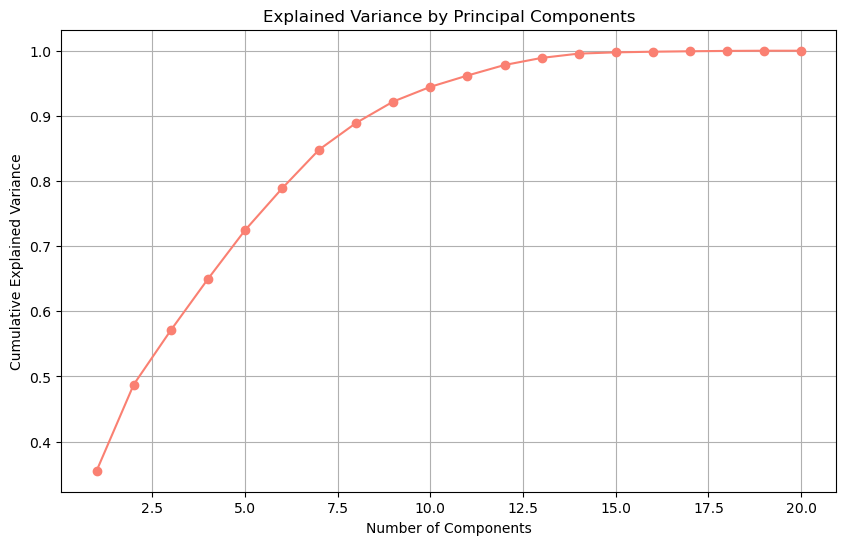

In [69]:
pca = PCA().fit(feature)

# Визуализация объясненной дисперсии на графике
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid(True)
plt.show()

In [70]:
pca.explained_variance_ratio_

array([3.55186049e-01, 1.32286552e-01, 8.33131994e-02, 7.86485302e-02,
       7.48607932e-02, 6.42427072e-02, 5.96259407e-02, 4.10624685e-02,
       3.27720048e-02, 2.25536277e-02, 1.73569631e-02, 1.61683024e-02,
       1.08919174e-02, 6.60518859e-03, 1.91327293e-03, 9.79951934e-04,
       7.07217084e-04, 5.42687138e-04, 2.82626131e-04, 3.15150310e-35])

In [71]:
pca = PCA(n_components=5)
pca.fit(feature)

PCA(n_components=5)

In [72]:
scores_pca = pca.transform(feature)

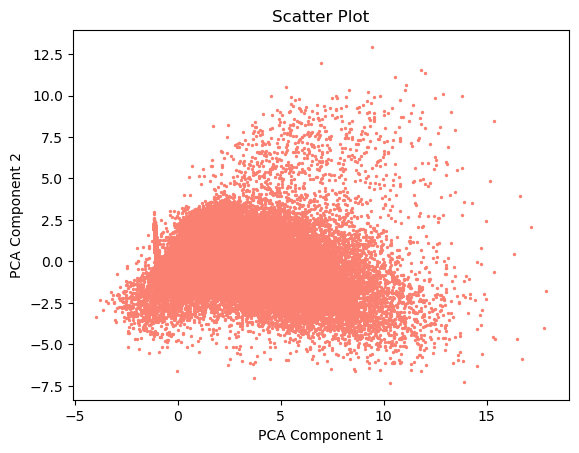

In [73]:
plt.scatter(scores_pca[:, 0], scores_pca[:, 2], s=2)

# Названия осей могут быть компонентами PCA
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Scatter Plot')

plt.show()

### K-means

В первую очередь использую метод локтя для определения оптимального количества кластеров

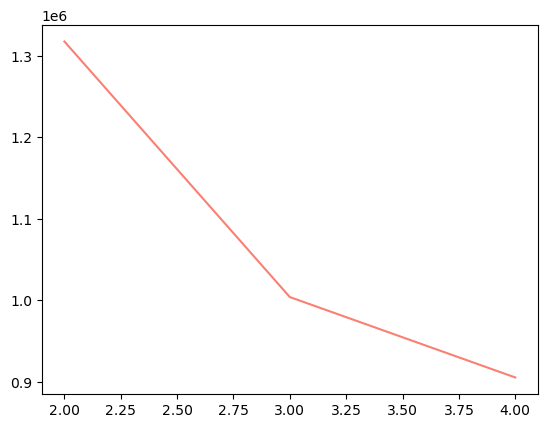

In [74]:
WCSS=[]
for i in range(2,5):
  kmeans=KMeans(n_clusters=i, random_state=42, init = 'k-means++')
  kmeans.fit(scores_pca)
  WCSS.append(kmeans.inertia_)
WCSS

plt.plot(range(2,5),WCSS)

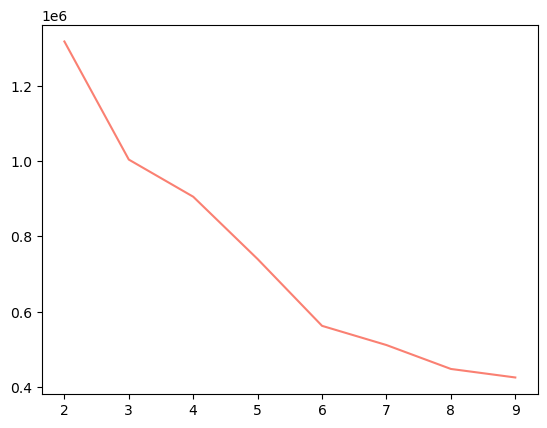

In [75]:
WCSS=[]
for i in range(2,10):
  kmeans=KMeans(n_clusters=i, random_state=42, init = 'k-means++')
  kmeans.fit(scores_pca)
  WCSS.append(kmeans.inertia_)
WCSS

plt.plot(range(2,10),WCSS)

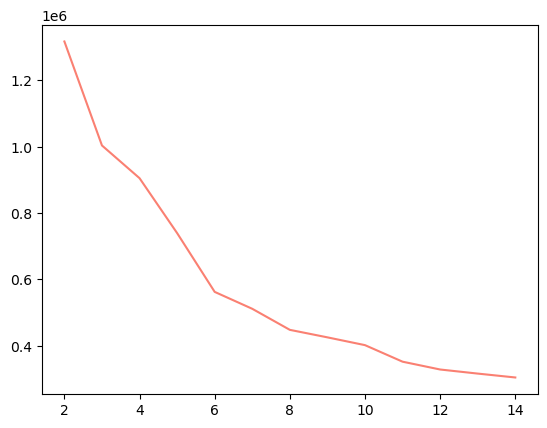

In [76]:
WCSS=[]
for i in range(2,15):
  kmeans=KMeans(n_clusters=i, random_state=42, init = 'k-means++')
  kmeans.fit(scores_pca)
  WCSS.append(kmeans.inertia_)
WCSS

plt.plot(range(2,15),WCSS)

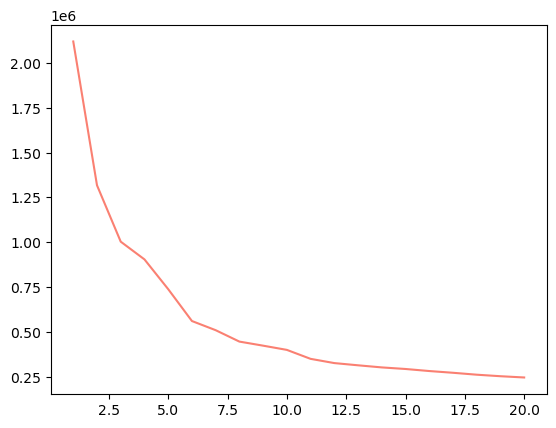

In [77]:
WCSS=[]
for i in range(1,21):
  kmeans=KMeans(n_clusters=i, random_state=42)
  kmeans.fit(scores_pca)
  WCSS.append(kmeans.inertia_)
WCSS

plt.plot(range(1,21),WCSS)

In [78]:
kmeans = KMeans(n_clusters=4, random_state=42, init='k-means++')

In [79]:
kmeans.fit(scores_pca)

KMeans(n_clusters=4, random_state=42)

In [80]:
# Создаем новый DataFrame с признаками, результатами PCA и присвоенными кластерами
df_segm_pca_kmeans = pd.concat([clients_copy.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)

# Переименовываем последние три столбца как 'Component 1', 'Component 2', и 'Component 3' и тд
df_segm_pca_kmeans.columns.values[-5:] = ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5' ]

# Добавляем столбец с метками кластеров, присвоенных K-means
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans.labels_

# Просматриваем первые строки результата
df_segm_pca_kmeans.head()

,gender,kval_flag,premial_flag,account_sum,remains_instrument_cnt,remains_sec,remains_bonds,remains_der,remains_curr,input_cnt,input_sum,yields_365,yields_90,deals_sum_month,trancnt_month,deals_sec,deals_bonds,deals_der,deals_curr,age,Component 1,Component 2,Component 3,Component 4,Component 5,Segment K-means PCA
0,1,0,0,0.688756,0.995868,-0.327563,-0.154199,-0.057563,2.044887,0.0,-0.093482,2.167606,3.215062,-0.228171,-0.233758,0,0,0,0,0.442638,2.748749,-2.715907,1.235721,1.503092,1.097973,2
1,1,0,0,-0.372160,-0.439974,-0.327563,-0.154199,-0.057563,-0.519940,0.0,-0.093482,-0.343020,-0.432611,-0.228171,-0.233758,0,0,0,0,0.209915,-1.056658,0.175924,-0.228605,0.066641,0.046802,3
2,1,0,0,-0.372160,-0.439974,-0.327563,-0.154199,-0.057563,-0.519940,0.0,-0.093482,-0.343020,-0.432611,-0.228171,-0.233758,0,0,0,0,-1.070062,-1.089059,0.117715,0.671242,-0.640503,-0.516725,0
3,1,0,0,-0.372160,-0.439974,-0.327563,-0.154199,-0.057563,-0.519940,0.0,-0.093482,-0.343020,-0.432611,-0.228171,-0.233758,0,0,0,0,-1.070062,-1.089059,0.117715,0.671242,-0.640503,-0.516725,0
4,1,0,0,-0.372160,-0.439974,-0.327563,-0.154199,-0.057563,-0.519940,0.0,-0.093482,-0.343020,-0.432611,-0.228171,-0.233758,0,0,0,0,1.838976,-1.015422,0.250009,-1.373866,0.966644,0.764019,3


In [81]:
# Создаем новый столбец 'Segment', который будет содержать осмысленные имена для кластеров
df_segm_pca_kmeans['Segment'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0: 'first', 
                                                                               1: 'second', 
                                                                               2: 'third', 
                                                                               3: 'fourth',
                                                                               4: 'fifth'})


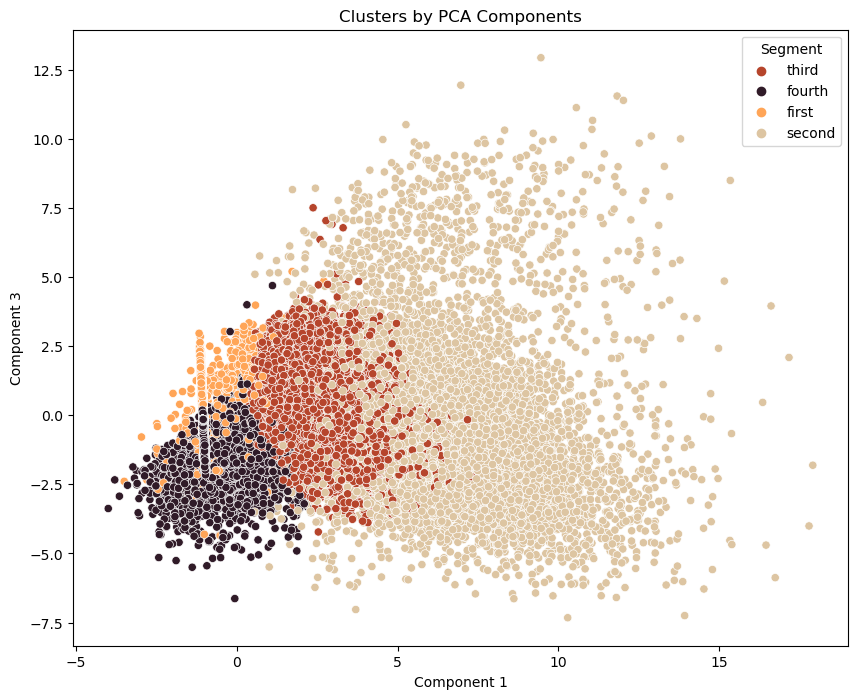

In [82]:
x_axis = df_segm_pca_kmeans['Component 1']
y_axis = df_segm_pca_kmeans['Component 3']

# Создаем scatter plot для визуализации кластеров по компонентам PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(x=x_axis, y=y_axis, hue=df_segm_pca_kmeans['Segment'], palette=['#B6452C', '#301B28', '#FFA557', '#DDC5A2'])
plt.title('Clusters by PCA Components')
plt.show()

Оценка качества кластеризации с помощью индекса Дэвиса-Болдина

In [83]:
davies_bouldin_score(scores_pca, kmeans.labels_)

1.0137125941112268

### Анализ кластеров

Сформируем наш датасет с полученными кластерами

In [84]:
clients_cluster = clients_cluster.reset_index(drop=True)

In [85]:
kmeans_labels_df = pd.DataFrame({'cluster_label': kmeans.labels_})

In [86]:
clients_clusters = pd.concat([clients_cluster, kmeans_labels_df], axis=1)

Посмотрим на средние значения, медиану и стандартное отклонение всех кластеров

In [87]:
clients_clusters.groupby('cluster_label').mean()

,id,gender,kval_flag,premial_flag,account_sum,remains_instrument_cnt,remains_sec,remains_bonds,remains_der,remains_curr,input_cnt,input_sum,yields_365,yields_90,deals_sum_month,trancnt_month,deals_sec,deals_bonds,deals_der,deals_curr,age
cluster_label,,,,,,,,,,,,,,,,,,,,,
0,146035.151977,0.765766,0.150079,0.012672,1.290823e+04,0.123933,0.050644,0.002470,0.000091,0.062584,0.0,544.626484,-0.481086,0.110562,4945.805467,0.068783,0.007000,0.000549,0.002036,0.000457,30.819841
1,151320.102017,0.625709,0.281778,0.015726,1.153528e+06,12.007590,8.126974,1.480752,0.161915,3.332581,0.0,43082.778667,18.325157,17.663928,720348.860631,10.531829,0.728410,0.158769,0.163282,0.041915,43.752821
2,149950.849802,0.657793,0.180837,0.012408,5.666060e+05,5.536308,2.371039,0.152052,0.000761,3.095838,0.0,2643.053552,26.487498,25.966856,41325.376618,0.506287,0.076632,0.008248,0.010459,0.004374,42.097217
3,151329.724293,0.721530,0.151136,0.011878,1.531205e+04,0.134889,0.064555,0.002890,0.000208,0.065803,0.0,489.790029,-0.809693,-0.131247,5015.720560,0.068344,0.006760,0.000579,0.002273,0.000438,45.752255


In [88]:
clients_clusters.groupby('cluster_label').median()

,id,gender,kval_flag,premial_flag,account_sum,remains_instrument_cnt,remains_sec,remains_bonds,remains_der,remains_curr,input_cnt,input_sum,yields_365,yields_90,deals_sum_month,trancnt_month,deals_sec,deals_bonds,deals_der,deals_curr,age
cluster_label,,,,,,,,,,,,,,,,,,,,,
0,137919.0,1.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000,0.0,0.0,0.0,0.0,0.0,32.0
1,153341.0,1.0,0.0,0.0,851803.72,10.0,7.0,0.0,0.0,3.0,0.0,0.0,22.090117,19.163968,671240.625,9.0,1.0,0.0,0.0,0.0,43.0
2,149667.0,1.0,0.0,0.0,522789.61,5.0,0.0,0.0,0.0,3.0,0.0,0.0,27.085201,26.143600,0.000,0.0,0.0,0.0,0.0,0.0,43.0
3,151764.0,1.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000,0.0,0.0,0.0,0.0,0.0,43.0


In [89]:
clients_clusters.groupby('cluster_label').std()

,id,gender,kval_flag,premial_flag,account_sum,remains_instrument_cnt,remains_sec,remains_bonds,remains_der,remains_curr,input_cnt,input_sum,yields_365,yields_90,deals_sum_month,trancnt_month,deals_sec,deals_bonds,deals_der,deals_curr,age
cluster_label,,,,,,,,,,,,,,,,,,,,,
0,92135.619651,0.423524,0.357153,0.111858,9.508080e+04,0.817456,0.483649,0.100976,0.013527,0.455213,0.0,14742.588257,5.857427,4.337113,58282.403955,0.808079,0.083371,0.023424,0.045075,0.021384,5.808140
1,85947.769760,0.483956,0.449881,0.124420,1.159937e+06,7.324002,6.067766,2.445786,0.696515,1.335539,0.0,127539.768427,25.326412,17.436695,621345.293463,8.224388,0.444795,0.365473,0.369635,0.200401,8.175880
2,86640.693292,0.474454,0.384888,0.110698,5.114443e+05,3.715079,3.516074,0.798149,0.041933,1.500983,0.0,30353.376471,16.656172,12.755752,152572.742938,1.875974,0.266010,0.090444,0.101732,0.065989,8.454707
3,84143.966566,0.448248,0.358183,0.108339,1.088298e+05,0.874064,0.552470,0.107647,0.021111,0.470909,0.0,13777.350337,6.845683,4.926315,58664.881901,0.811062,0.081942,0.024065,0.047624,0.020931,5.783340


In [91]:
# Подсчет количества клиентов, которые являются и премиальными, и квалифицированными
premial_and_kval = clients_clusters[(clients_clusters['premial_flag'] == 1) & (clients_clusters['kval_flag'] == 1)].groupby('cluster_label').size()

# Подсчет количества только премиальных клиентов
only_premial = clients_clusters[(clients_clusters['premial_flag'] == 1) & (clients_clusters['kval_flag'] == 0)].groupby('cluster_label').size()

# Подсчет количества только квалифицированных клиентов
only_kval = clients_clusters[(clients_clusters['premial_flag'] == 0) & (clients_clusters['kval_flag'] == 1)].groupby('cluster_label').size()

# Подсчет количества клиентов, которые не являются ни премиальными, ни квалифицированными
neither = clients_clusters[(clients_clusters['premial_flag'] == 0) & (clients_clusters['kval_flag'] == 0)].groupby('cluster_label').size()

# Общее количество клиентов в каждом кластере
total_clients = clients_clusters.groupby('cluster_label').size()

# Объединение все в одну таблицу
cluster_client_counts = pd.DataFrame({
    'Премиальные и квалифицированные': premial_and_kval,
    'Только премиальные': only_premial,
    'Только квалифицированные': only_kval,
    'Не премиальные и не квалифицированные': neither,
    'Общее количество клиентов': total_clients
})
cluster_client_counts['Доля премиальных и квалифицированных'] = (cluster_client_counts['Премиальные и квалифицированные'] + cluster_client_counts['Только премиальные'] + cluster_client_counts['Только квалифицированные'] / cluster_client_counts['Общее количество клиентов']) / 100
cluster_client_counts

,Премиальные и квалифицированные,Только премиальные,Только квалифицированные,Не премиальные и не квалифицированные,Общее количество клиентов,Доля премиальных и квалифицированных
cluster_label,,,,,,
0,89,465,6472,36691,43717,5.541480
1,78,152,4043,10352,14625,2.302764
2,98,424,7510,34039,42071,5.221785
3,247,1352,20098,112917,134614,15.991493


**Вот краткие выводы по всем четырем кластерам на основе проведенного анализа:**

Кластер 0:
+ Характеристика: Молодые клиенты с небольшой суммой на счету и низкой активностью в сделках.
+ Вывод: Вероятно, это начинающие клиенты или клиенты с низкой вовлеченностью. Это может быть группа новых клиентов или клиентов с низкой заинтересованностью. Целесообразно предложить им простые и понятные продукты, а также стимулы для повышения активности, например, предложить акции и программы 

Кластер 1:
+ Характеристика: Более возрастная группа с высокой активностью и крупными счетами. Наиболее состоятельные и активные клиенты.
+ Вывод: Это премиальные клиенты, которые приносят основной доход компании. Их необходимо удерживать с помощью индивидуальных и эксклюзивных предложений, например VIP-обслуживание, ввести бонусы за крупные сделки, оценивать их активности и на основе этого предлагать персональные предложения.

Кластер 2:
+ Характеристика: Средний возраст, высокий уровень доходности за последние 365 и 90 дней, умеренная активность.
+ Вывод: Это успешные и относительно активные инвесторы с хорошей доходностью, но с меньшими средствами по сравнению с кластером 1. Эти клиенты уже успешны, но их можно мотивировать на увеличение вложений и активность. Предложить инвестиционные возможности с высоким потенциалом доходности, чтобы стимулировать их увеличить активы. 

Кластер 3:
+ Характеристика: Старшие клиенты с низкой активностью и небольшими счетами.
+ Вывод: Вероятно, это менее активные, опытные клиенты, которые не участвуют в активной торговле. Эти клиенты могут нуждаться в напоминаниях о возможностях и продуктах с низким риском, чтобы вернуться к активной торговле. Например, рассылка сообщений о выгодных возможностях.
